In [1]:
import torch
from transformers import AutoModelForCausalLM
from transformers import AutoTokenizer, EsmForMaskedLM
from tokenizers import Tokenizer
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

/opt/anaconda3/envs/MachLearn/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open('/Users/johnhutchens/Desktop/Practicum/Data/ems_pbd_long_matrices.pickle',
           'rb') as f:
    esm_dict = pickle.load(f)

with open('/Users/johnhutchens/Desktop/Practicum/Data/pg_pbd_long_matrices.pickle',
           'rb') as f:
    pg_dict = pickle.load(f)

In [3]:
seq_esm_5 = esm_dict[5]['sequence']
seq_pg_5 = pg_dict[5]['sequence']

In [4]:
print(seq_esm_5)
print(seq_pg_5)

print(len(seq_esm_5))
print(len(seq_pg_5))

MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAAELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL
MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAAELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL
166
166


In [5]:
lp_esm_matrix5 = esm_dict[90]['log_probs']

lp_pg_matrix5 = pg_dict[90]['log_probs']

for i in range(15):
    print(torch.sum(torch.exp(lp_esm_matrix5[i])))
    print(torch.sum(torch.exp(lp_pg_matrix5[i])))

tensor(1.0000)
tensor(0.9946)
tensor(1.0000)
tensor(0.9997)
tensor(1.0000)
tensor(0.9993)
tensor(1.0000)
tensor(0.9998)
tensor(1.0000)
tensor(0.9999)
tensor(1.0000)
tensor(0.9999)
tensor(1.0000)
tensor(0.9998)
tensor(1.0000)
tensor(0.9999)
tensor(1.0000)
tensor(0.9999)
tensor(1.0000)
tensor(0.9999)
tensor(1.0000)
tensor(0.9999)
tensor(1.0000)
tensor(0.9998)
tensor(1.0000)
tensor(0.9998)
tensor(1.0000)
tensor(0.9999)
tensor(1.0000)
tensor(0.9999)


In [6]:
lp_esm_matrix5[0]

tensor([-1.1557e+01, -1.4627e+01, -1.3542e+01, -1.3628e+01, -1.2969e+01,
        -1.3552e+01, -1.4000e+01, -1.2408e+01, -1.2500e+01, -1.1844e+01,
        -7.2953e-05, -1.2834e+01, -1.1725e+01, -1.2938e+01, -1.2986e+01,
        -1.1974e+01, -1.1698e+01, -1.1604e+01, -1.4222e+01, -1.3845e+01])

In [7]:
A = lp_esm_matrix5
B = lp_pg_matrix5

eA = torch.exp(A)
eB = torch.exp(B)

kl_div = torch.sum(eA[100] * (A[100] - B[100]))
kl_div

tensor(2.7702)

In [9]:
A = lp_esm_matrix5
B = lp_pg_matrix5

eA = torch.exp(A)
eB = torch.exp(B)

n = len(A)

kl_list = []
for i in range(n):
    kl_div = torch.sum(eA[i] * (A[i] - B[i]))
    kl_list.append(kl_div)

In [10]:
print(np.array(kl_list).mean())
kl_list

2.6297421


[tensor(1.2228),
 tensor(2.5764),
 tensor(3.0078),
 tensor(2.8355),
 tensor(2.4624),
 tensor(3.9679),
 tensor(2.0353),
 tensor(1.8365),
 tensor(2.0014),
 tensor(3.6016),
 tensor(2.7130),
 tensor(3.0274),
 tensor(2.4243),
 tensor(2.6462),
 tensor(2.3225),
 tensor(2.8679),
 tensor(2.8478),
 tensor(3.2576),
 tensor(2.4889),
 tensor(2.6010),
 tensor(2.9649),
 tensor(2.5303),
 tensor(2.8536),
 tensor(3.3274),
 tensor(2.8472),
 tensor(2.8422),
 tensor(2.7783),
 tensor(2.7561),
 tensor(2.9389),
 tensor(2.7700),
 tensor(3.6692),
 tensor(2.7584),
 tensor(2.4086),
 tensor(1.5679),
 tensor(2.2319),
 tensor(1.4741),
 tensor(2.8514),
 tensor(2.5016),
 tensor(2.3177),
 tensor(1.4403),
 tensor(1.7488),
 tensor(2.3921),
 tensor(2.8052),
 tensor(1.6172),
 tensor(2.6272),
 tensor(2.0019),
 tensor(2.7957),
 tensor(2.6219),
 tensor(2.2652),
 tensor(2.3411),
 tensor(2.8352),
 tensor(2.9541),
 tensor(2.9954),
 tensor(2.9129),
 tensor(3.0231),
 tensor(2.8474),
 tensor(2.3608),
 tensor(2.4487),
 tensor(2.9261

In [13]:
kl_dict = dict()

for j in range(100):
    
    A = esm_dict[j]['log_probs']
    B = pg_dict[j]['log_probs']

    eA = torch.exp(A)
    eB = torch.exp(B)

    n = len(A)

    kl_list = []
    for i in range(n):
        kl_div = torch.sum(eA[i] * (A[i] - B[i]))
        kl_list.append(kl_div)
    kl_dict[j] = kl_list

In [14]:
for i in kl_dict:
    print(kl_dict[i])
    print(torch.tensor(kl_dict[i]).mean())

[tensor(1.3157), tensor(1.8051), tensor(2.5154), tensor(2.3112), tensor(2.3776), tensor(1.2634), tensor(2.3099), tensor(3.5105), tensor(1.5888), tensor(1.1358), tensor(2.5062), tensor(1.3192), tensor(0.6567), tensor(2.7179), tensor(4.2497), tensor(1.6154), tensor(1.4332), tensor(2.5370), tensor(2.3678), tensor(1.5665), tensor(2.7810), tensor(1.7681), tensor(1.8005), tensor(2.3954), tensor(2.6364), tensor(2.6202), tensor(2.0259), tensor(2.5493), tensor(3.3306), tensor(2.4410), tensor(2.5728), tensor(2.6649), tensor(2.4456), tensor(2.9488), tensor(2.2188), tensor(1.8859), tensor(3.3179), tensor(2.9528), tensor(1.9951), tensor(3.0421), tensor(1.6409), tensor(2.2061), tensor(1.9904), tensor(2.6013), tensor(1.9144), tensor(1.8131), tensor(2.7181), tensor(2.9730), tensor(2.8024), tensor(2.0183), tensor(2.1563), tensor(2.7136), tensor(2.5629), tensor(2.0555), tensor(2.1350), tensor(3.3272), tensor(2.1130), tensor(1.7872), tensor(2.7632), tensor(1.9178), tensor(2.4177), tensor(2.1279), tensor(

In [25]:
l1_dict = dict()

for j in range(100):
    
    A = esm_dict[j]['log_probs']
    B = pg_dict[j]['log_probs']

    eA = torch.exp(A)
    eB = torch.exp(B)

    n = len(A)

    l1_list = []
    for i in range(n):
        l1_diff = torch.sum( torch.abs(eA[i] - eB[i]))/20
        # print(eA[i],eB[i], l1_diff)
        l1_list.append(l1_diff)
    l1_dict[j] = l1_list

In [29]:
#l1_dict
for i in l1_dict:
    print(l1_dict[i])
    print(torch.tensor(l1_dict[i]).min())
    print(torch.tensor(l1_dict[i]).mean())
    print(torch.tensor(l1_dict[i]).max())

[tensor(0.0733), tensor(0.0673), tensor(0.0914), tensor(0.0861), tensor(0.0865), tensor(0.0601), tensor(0.0888), tensor(0.0882), tensor(0.0662), tensor(0.0577), tensor(0.0887), tensor(0.0693), tensor(0.0461), tensor(0.0868), tensor(0.0982), tensor(0.0751), tensor(0.0680), tensor(0.0910), tensor(0.0901), tensor(0.0780), tensor(0.0937), tensor(0.0730), tensor(0.0802), tensor(0.0903), tensor(0.0855), tensor(0.0926), tensor(0.0709), tensor(0.0889), tensor(0.0937), tensor(0.0912), tensor(0.0879), tensor(0.0917), tensor(0.0912), tensor(0.0947), tensor(0.0829), tensor(0.0762), tensor(0.0957), tensor(0.0944), tensor(0.0862), tensor(0.0950), tensor(0.0784), tensor(0.0846), tensor(0.0789), tensor(0.0926), tensor(0.0760), tensor(0.0826), tensor(0.0916), tensor(0.0946), tensor(0.0831), tensor(0.0866), tensor(0.0860), tensor(0.0908), tensor(0.0917), tensor(0.0837), tensor(0.0865), tensor(0.0928), tensor(0.0868), tensor(0.0806), tensor(0.0918), tensor(0.0771), tensor(0.0882), tensor(0.0847), tensor(

In [27]:
print(l1_dict[80])
print(torch.tensor(l1_dict[80]).mean())

[tensor(0.0697), tensor(0.0909), tensor(0.0920), tensor(0.0884), tensor(0.0889), tensor(0.0973), tensor(0.0878), tensor(0.0792), tensor(0.0800), tensor(0.0973), tensor(0.0935), tensor(0.0942), tensor(0.0919), tensor(0.0938), tensor(0.0903), tensor(0.0943), tensor(0.0898), tensor(0.0958), tensor(0.0918), tensor(0.0929), tensor(0.0941), tensor(0.0929), tensor(0.0933), tensor(0.0953), tensor(0.0941), tensor(0.0938), tensor(0.0933), tensor(0.0940), tensor(0.0939), tensor(0.0936), tensor(0.0975), tensor(0.0940), tensor(0.0927), tensor(0.0933), tensor(0.0871), tensor(0.0891), tensor(0.0971), tensor(0.0887), tensor(0.0916), tensor(0.0600), tensor(0.0784), tensor(0.0917), tensor(0.0941), tensor(0.0704), tensor(0.0932), tensor(0.0835), tensor(0.0945), tensor(0.0885), tensor(0.0895), tensor(0.0875), tensor(0.0942), tensor(0.0946), tensor(0.0954), tensor(0.0946), tensor(0.0950), tensor(0.0941), tensor(0.0893), tensor(0.0910), tensor(0.0941), tensor(0.0938), tensor(0.0793), tensor(0.0829), tensor(

In [35]:
A = esm_dict[5]['log_probs']
B = pg_dict[5]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

print(np.array(eA)[10])
print(np.sum(np.array(eA[10])))

print(np.array(eB)[10])
print(np.sum(np.array(eB[10])))


[2.8588984e-05 5.3379858e-06 2.3651492e-05 9.9920672e-01 3.8690500e-06
 8.8021727e-05 1.1718168e-05 5.7387028e-06 2.8385621e-04 3.0787847e-05
 2.9285782e-06 1.3385606e-05 4.6293819e-05 1.1535367e-04 3.9360872e-05
 3.8951082e-05 6.7415617e-06 2.0182133e-05 4.2643369e-06 9.1224902e-06]
0.9999849
[0.06785919 0.00599657 0.06319239 0.06270397 0.03790355 0.05702949
 0.01716259 0.05908136 0.08219863 0.10320091 0.01920097 0.05524621
 0.04953598 0.03732844 0.07030982 0.06160433 0.05547767 0.05167301
 0.01169557 0.03146058]
0.99986124


/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1281/3026323315.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  print(np.array(eA)[10])
/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1281/3026323315.py:8: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  print(np.sum(np.array(eA[10])))
/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1281/3026323315.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1281/3412472156.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  probs1 = np.array(eA)[10]
/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1281/3412472156.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  probs2 = np.array(eB)[10]


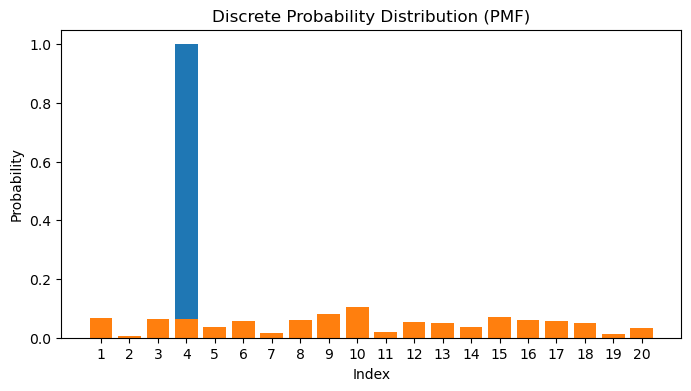

In [40]:
probs1 = np.array(eA)[10]
probs2 = np.array(eB)[10]

# normalize to make sure it sums to 1
dist1 = probs1 / probs1.sum()
dist2 = probs2 / probs2.sum()

# make x-axis for categories

x = torch.arange(1, len(dist) + 1)

# plot as bar chart (PMF)
plt.figure(figsize=(8, 4))
plt.bar(x, dist1)
plt.bar(x,dist2)
plt.xticks(x)
plt.xlabel("Index")
plt.ylabel("Probability")
plt.title("Discrete Probability Distribution (PMF)")
plt.show()

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1281/4281070724.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  pairs10 = [(np.array(eA)[i], np.array(eB)[i]) for i in range(10)]


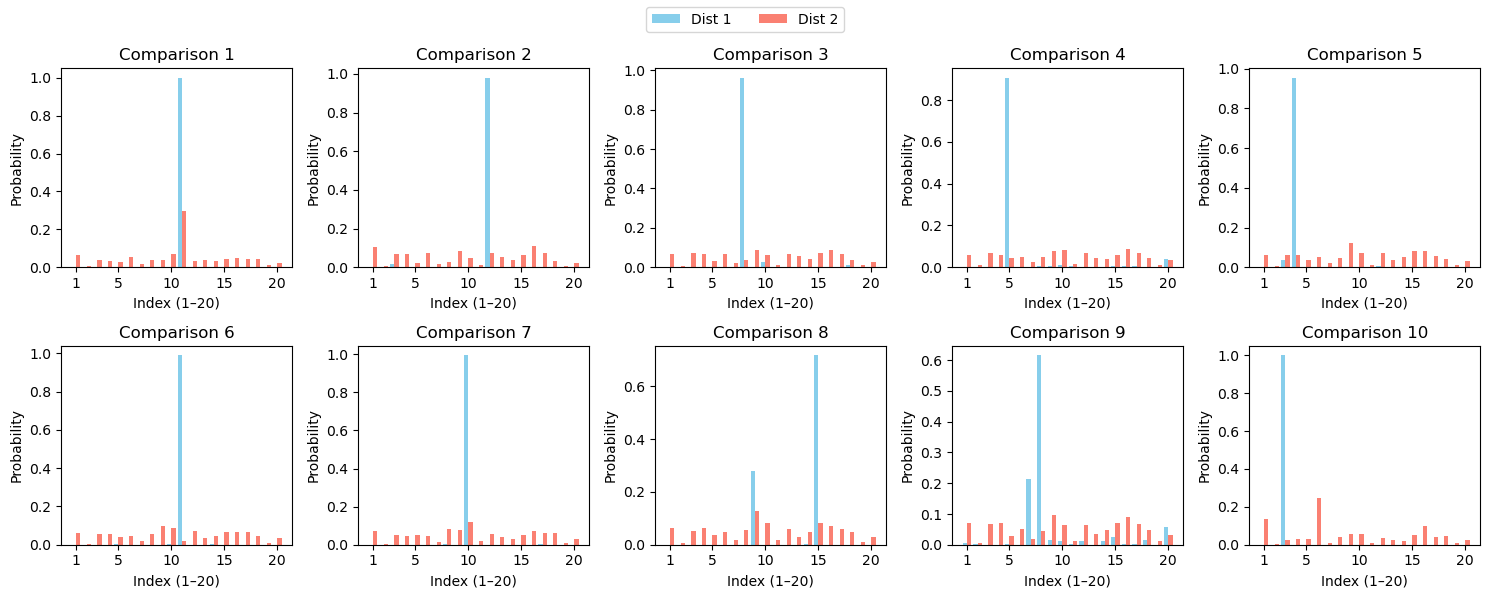

In [44]:
A = esm_dict[5]['log_probs']
B = pg_dict[5]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

pairs10 = [(np.array(eA)[i], np.array(eB)[i]) for i in range(10)]

# Plot settings
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()
bar_width = 0.4
x = torch.arange(1, 21)

for i, ax in enumerate(axes):
    dist1, dist2 = pairs10[i]
    ax.bar(x - bar_width/2, dist1, width=bar_width, label="Dist 1", color="skyblue")
    ax.bar(x + bar_width/2, dist2, width=bar_width, label="Dist 2", color="salmon")
    ax.set_title(f"Comparison {i+1}")
    ax.set_xlabel("Index (1–20)")
    ax.set_ylabel("Probability")
    ax.set_xticks([1, 5, 10, 15, 20])  # fewer ticks for readability
    ax.tick_params(axis='x', rotation=0)

# Add a single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1281/2365141684.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  pairs10 = [(np.array(eA)[i], np.array(eB)[i]) for i in range(10,20)]


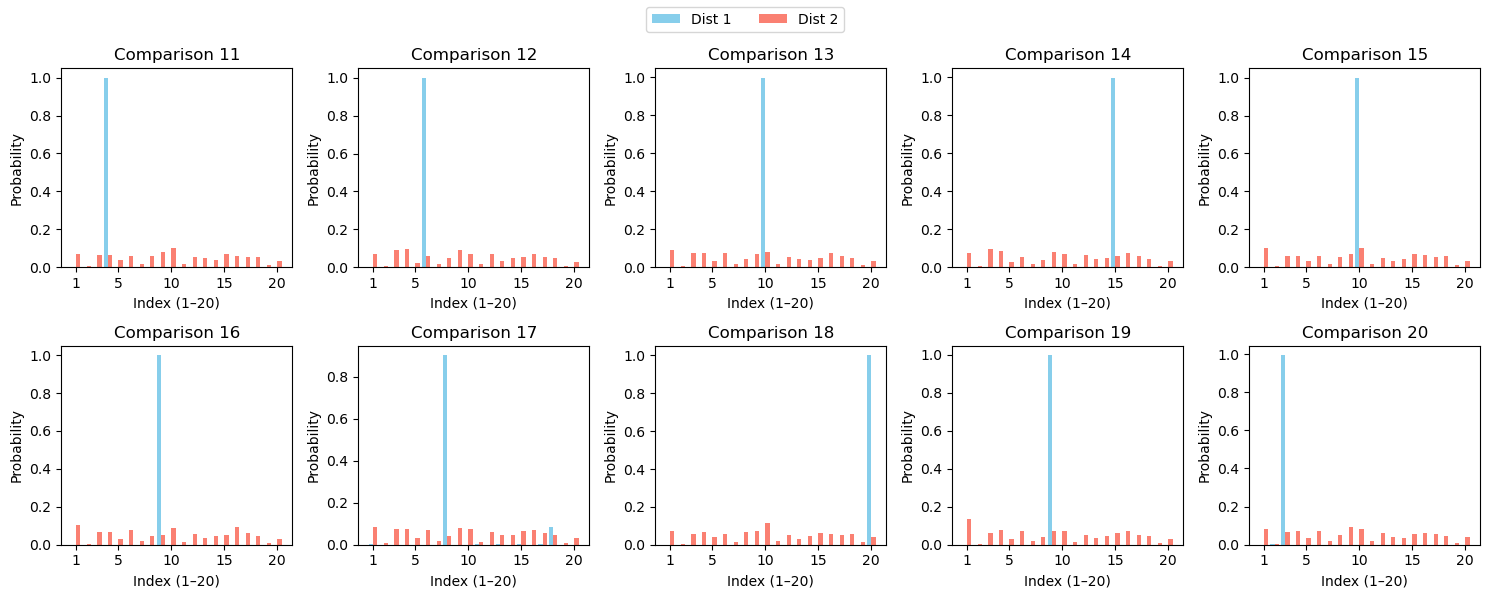

In [45]:
A = esm_dict[5]['log_probs']
B = pg_dict[5]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

pairs10 = [(np.array(eA)[i], np.array(eB)[i]) for i in range(10,20)]

# Plot settings
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()
bar_width = 0.4
x = torch.arange(1, 21)

for i, ax in enumerate(axes):
    dist1, dist2 = pairs10[i]
    ax.bar(x - bar_width/2, dist1, width=bar_width, label="Dist 1", color="skyblue")
    ax.bar(x + bar_width/2, dist2, width=bar_width, label="Dist 2", color="salmon")
    ax.set_title(f"Comparison {i+11}")
    ax.set_xlabel("Index (1–20)")
    ax.set_ylabel("Probability")
    ax.set_xticks([1, 5, 10, 15, 20])  # fewer ticks for readability
    ax.tick_params(axis='x', rotation=0)

# Add a single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1281/1758843605.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  pairs10 = [(np.array(eA)[i], np.array(eB)[i]) for i in range(100,110)]


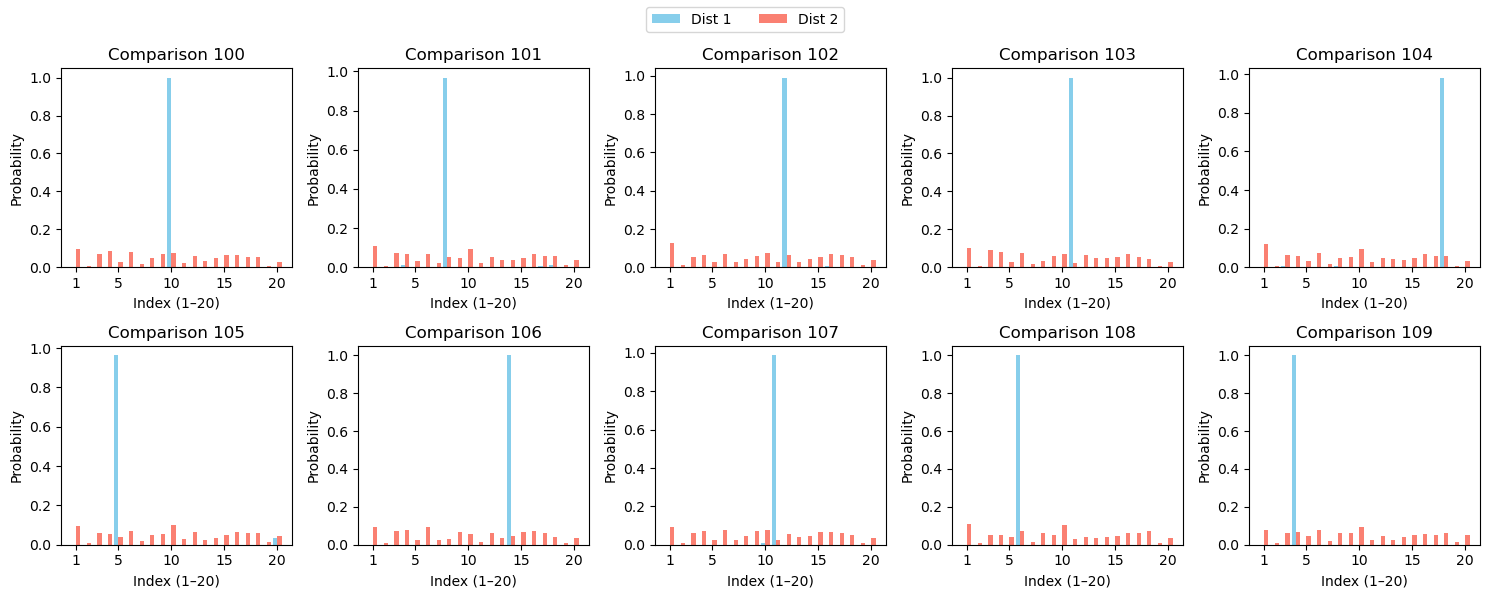

In [46]:
A = esm_dict[5]['log_probs']
B = pg_dict[5]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

pairs10 = [(np.array(eA)[i], np.array(eB)[i]) for i in range(100,110)]

# Plot settings
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()
bar_width = 0.4
x = torch.arange(1, 21)

for i, ax in enumerate(axes):
    dist1, dist2 = pairs10[i]
    ax.bar(x - bar_width/2, dist1, width=bar_width, label="Dist 1", color="skyblue")
    ax.bar(x + bar_width/2, dist2, width=bar_width, label="Dist 2", color="salmon")
    ax.set_title(f"Comparison {i+100}")
    ax.set_xlabel("Index (1–20)")
    ax.set_ylabel("Probability")
    ax.set_xticks([1, 5, 10, 15, 20])  # fewer ticks for readability
    ax.tick_params(axis='x', rotation=0)

# Add a single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1281/408260462.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  pairs10 = [(np.array(eA)[i], np.array(eB)[i]) for i in range(150,160)]


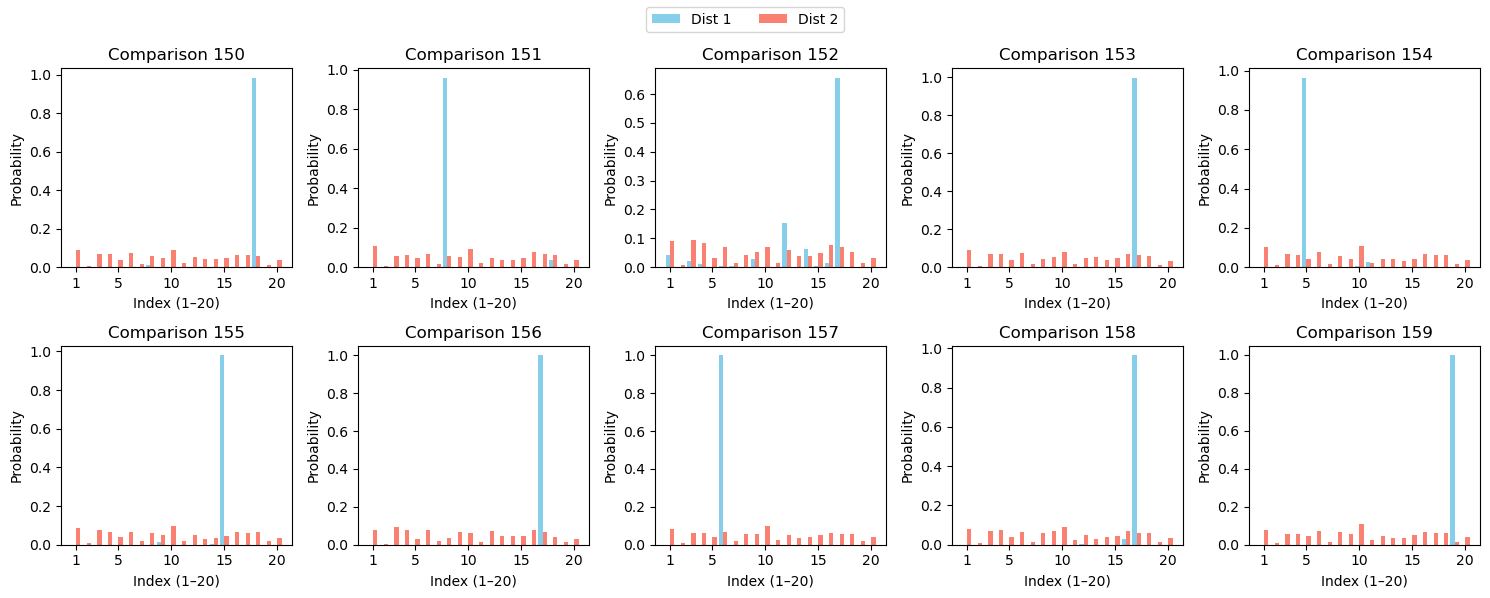

In [47]:
A = esm_dict[5]['log_probs']
B = pg_dict[5]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

pairs10 = [(np.array(eA)[i], np.array(eB)[i]) for i in range(150,160)]

# Plot settings
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()
bar_width = 0.4
x = torch.arange(1, 21)

for i, ax in enumerate(axes):
    dist1, dist2 = pairs10[i]
    ax.bar(x - bar_width/2, dist1, width=bar_width, label="Dist 1", color="skyblue")
    ax.bar(x + bar_width/2, dist2, width=bar_width, label="Dist 2", color="salmon")
    ax.set_title(f"Comparison {i+150}")
    ax.set_xlabel("Index (1–20)")
    ax.set_ylabel("Probability")
    ax.set_xticks([1, 5, 10, 15, 20])  # fewer ticks for readability
    ax.tick_params(axis='x', rotation=0)

# Add a single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1281/2900150406.py:9: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  np.array(eA)[10],
/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1281/2900150406.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  np.array(eB)[10]


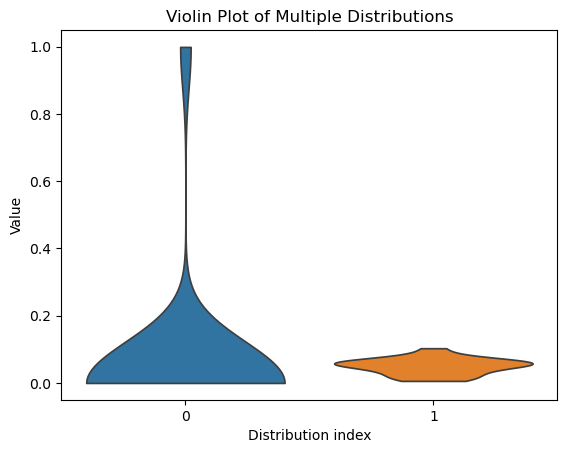

In [31]:
A = esm_dict[5]['log_probs']
#B = esm_dict[6]['log_probs']
B = pg_dict[5]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

dists = [
    np.array(eA)[10],
    np.array(eB)[10]
]

# Create violin plot
sns.violinplot(data=dists, cut=0, inner=None)

# Label axes
plt.xlabel('Distribution index')
plt.ylabel('Value')
plt.title('Violin Plot of Multiple Distributions')

plt.show()

In [42]:
eA = torch.exp(A)
eB = torch.exp(B)

torch.min(eB)

tensor(0.0028)

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1281/485347218.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  dist1 = np.array(eA)[98]
/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1281/485347218.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  dist2 = np.array(eB)[98]


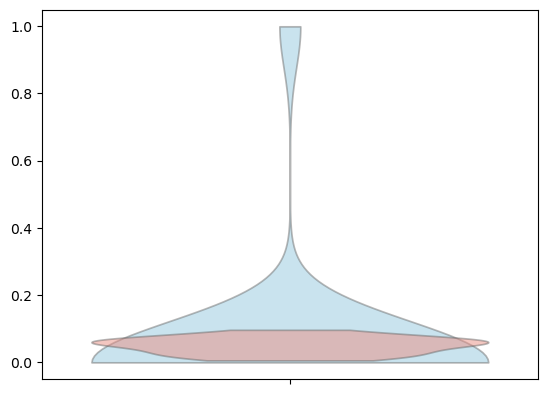

In [30]:
# Two distributions
dist1 = np.array(eA)[98]
dist2 = np.array(eB)[98]

sns.violinplot(y=dist1, color="skyblue", alpha=0.5, cut=0, inner=None)
sns.violinplot(y=dist2, color="salmon", alpha=0.5, cut=0, inner=None)

plt.title("")
plt.ylabel("")
plt.show()

In [43]:
A = esm_dict[3]['log_probs']
B = pg_dict[3]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

dists1 = []
dists2 = []
for i in range(len(A)):
    da = np.array(eA[i])
    db = np.array(eB[i])
    dists1.append(da)
    dists2.append(db)



/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1294/2506594936.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  da = np.array(eA[i])
/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_1294/2506594936.py:11: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  db = np.array(eB[i])


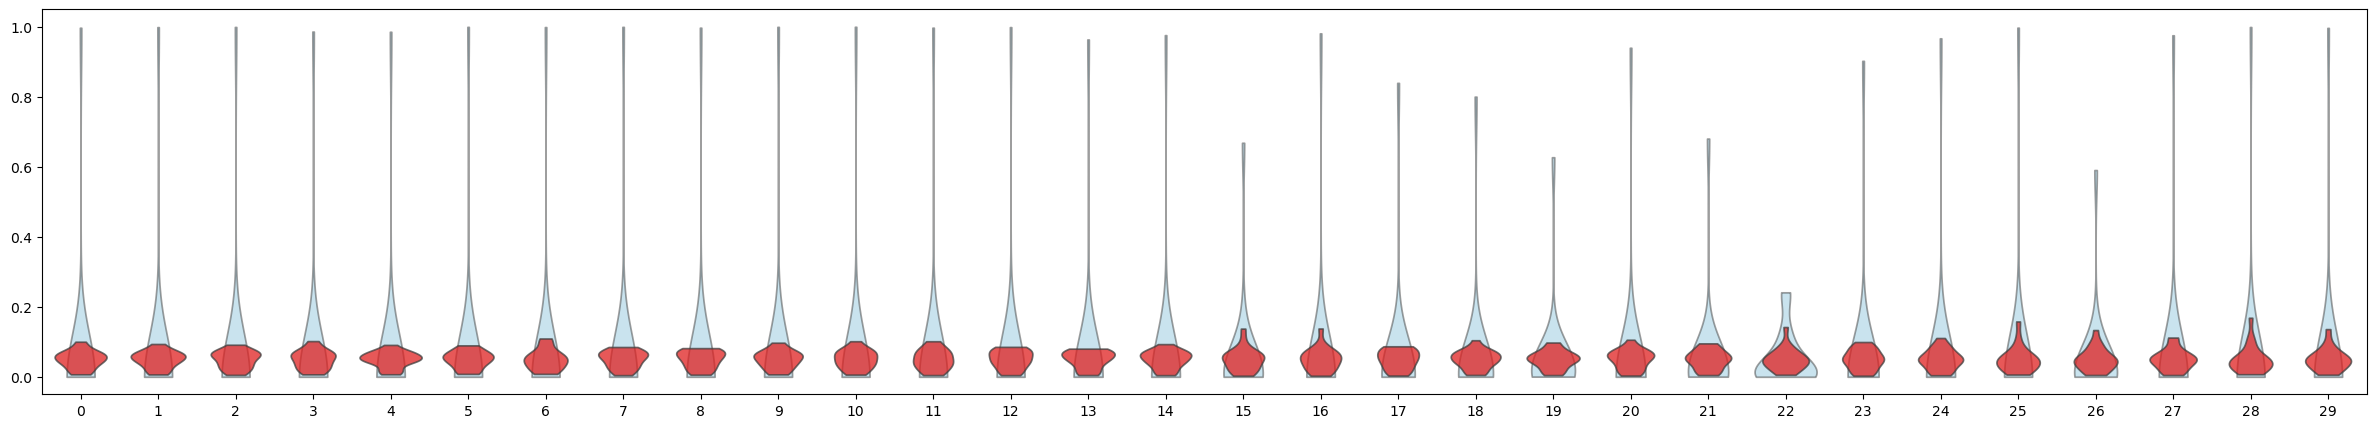

In [55]:
plt.figure(figsize=(30, 5))
sns.violinplot(data=dists1[20:50], color="skyblue", alpha=0.5, inner=None, cut=0)
sns.violinplot(data=dists2[20:50], color="red", alpha=0.75, inner=None, cut=0)
plt.title("")
plt.ylabel("")
plt.show()

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2843/3143873620.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  da = np.array(eA[i])
/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2843/3143873620.py:11: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  db = np.array(eB[i])


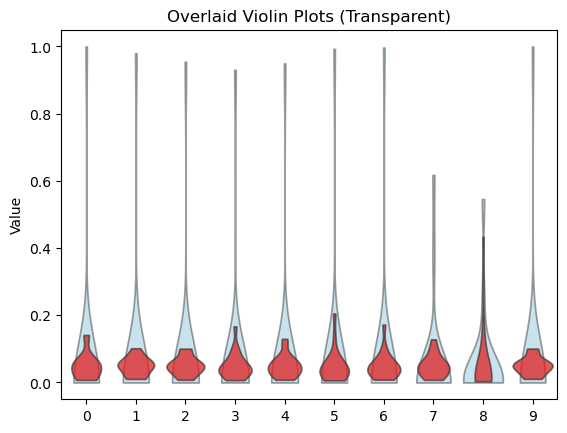

In [18]:
A = esm_dict[21]['log_probs']
B = pg_dict[21]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

dists1 = []
dists2 = []
for i in range(len(A)):
    da = np.array(eA[i])
    db = np.array(eB[i])
    dists1.append(da)
    dists2.append(db)

sns.violinplot(data=dists1[0:10], color="skyblue", alpha=0.5, inner=None, cut=0)
sns.violinplot(data=dists2[0:10], color="red", alpha=0.75, inner=None, cut=0)

plt.title("Overlaid Violin Plots (Transparent)")
plt.ylabel("Value")
plt.show()

In [75]:
print(esm_dict[21]['log_probs'][0][1:10])
print(esm_dict[97]['log_probs'][0][1:10])

tensor([-14.6385, -13.3915, -13.6057, -12.7970, -13.1115, -13.8592, -12.2731,
        -11.9722, -11.8724])
tensor([-15.1603, -13.7140, -13.8830, -13.0869, -13.6199, -14.1788, -12.5288,
        -12.5929, -11.9967])


PPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKASCLYGQLPKFQDGDLTLYQSNTILRHLGRTLGLYGKDQQEAALVDMVNDGVEDLRCKYISLIYTNYEAGKDDYVKALPGQLKPFETLLSQNQGGKTFIVGDQISFADYNLLDLLLIHEVLAPGCLDAFPLLSAYVGRLSARPKLKAFLASPEYVNLPINGNGKQ
MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL


/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2332/3406712376.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  da = np.array(eA[i])
/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2332/3406712376.py:14: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  db = np.array(eB[i])


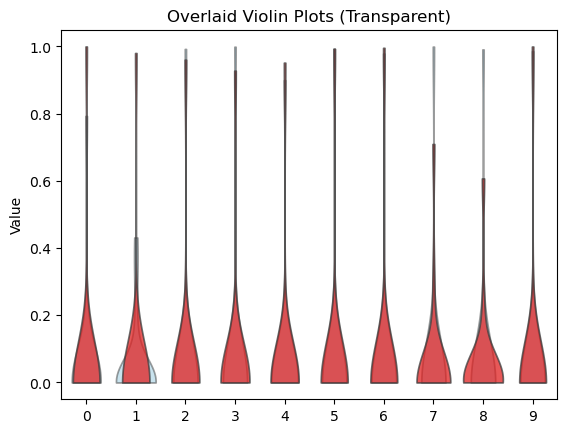

In [81]:
print(esm_dict[17]['sequence'])
print(esm_dict[1]['sequence'])

A = esm_dict[17]['log_probs']
B = esm_dict[1]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

dists1 = []
dists2 = []
for i in range(20):
    da = np.array(eA[i])
    db = np.array(eB[i])
    dists1.append(da)
    dists2.append(db)

sns.violinplot(data=dists1[0:10], color="skyblue", alpha=0.5, inner=None, cut=0)
sns.violinplot(data=dists2[0:10], color="red", alpha=0.75, inner=None, cut=0)

#cut off y-axis at zero

plt.title("Overlaid Violin Plots (Transparent)")
plt.ylabel("Value")
plt.show()

In [79]:
A = esm_dict[21]['log_probs']
print(A[10])

eA = torch.exp(A)
print(eA[10])

tensor([-1.0470e+01, -1.2294e+01, -1.0868e+01, -7.6313e-04, -1.2674e+01,
        -9.2160e+00, -1.1557e+01, -1.2295e+01, -8.2046e+00, -1.0543e+01,
        -1.2924e+01, -1.1268e+01, -1.0120e+01, -9.1488e+00, -1.0254e+01,
        -1.0150e+01, -1.1869e+01, -1.0828e+01, -1.2485e+01, -1.1727e+01])
tensor([2.8388e-05, 4.5801e-06, 1.9066e-05, 9.9924e-01, 3.1303e-06, 9.9432e-05,
        9.5733e-06, 4.5754e-06, 2.7338e-04, 2.6388e-05, 2.4396e-06, 1.2775e-05,
        4.0278e-05, 1.0634e-04, 3.5200e-05, 3.9081e-05, 7.0045e-06, 1.9827e-05,
        3.7842e-06, 8.0718e-06])
